In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import math
import copy
import noise
import time

In [13]:
# helper functions
def find_neighbours(arr):
    '''
    This function finds all the non-diagonal neighbours of a value in a given array.
    '''
    neighbors = []

    for i in range(len(arr)):
        for j, value in enumerate(arr[i]):

            if i == 0 or i == len(arr) - 1 or j == 0 or j == len(arr[i]) - 1:
                # corners
                new_neighbors = []
                if i != 0:
                    new_neighbors.append(arr[i - 1][j])  # top neighbor
                if j != len(arr[i]) - 1:
                    new_neighbors.append(arr[i][j + 1])  # right neighbor
                if i != len(arr) - 1:
                    new_neighbors.append(arr[i + 1][j])  # bottom neighbor
                if j != 0:
                    new_neighbors.append(arr[i][j - 1])  # left neighbor

            else:
                # add neighbors
                new_neighbors = [
                    arr[i - 1][j],  # top neighbor
                    arr[i][j + 1],  # right neighbor
                    arr[i + 1][j],  # bottom neighbor
                    arr[i][j - 1]   # left neighbor
                ]

            neighbors.append({
                value: new_neighbors
                })

    return neighbors


def neighbors_full(matrix,radius, row_number, column_number):
    '''
    This function finds all the neighbours (diagonal and non-diagonal) of a value in a given array.
    '''
    return [[matrix[i][j] if  i >= 0 and i < len(matrix) and j >= 0 and j < len(matrix[0]) else 0
                for j in range(column_number-1-radius, column_number+radius)]
                    for i in range(row_number-1-radius, row_number+radius)]


def flatten(l):
    '''
    flattens list of lists into a single list
    '''
    return [item for sublist in l for item in sublist]

def sigmoid(x):
            return 1.0 / (1.0 + np.exp(-0.5*x))

def calculate_next_step(pheromones_l,pheromones_r):
    '''
    This function calculates if an ant in the system will take its next step 
    to the right or left given the pheromone levels on both nodes.
    '''
    p_left = ((5+pheromones_l)**2)/((5+pheromones_l)**2+((5+pheromones_r)**2))
    p_right = 1 - p_left

    return p_left, p_right

def take_next_step(pheromones_l,pheromones_r):
    '''
    This function calculates if an ant in the system will take any next step 
    given the pheromone levels on both nodes.
    '''
    return 0.5 + 0.5*np.tanh((pheromones_l+pheromones_r)/100 -1)


def multiplot(nodes,one=False,two=False,total=False,exp=0):
    '''
    This function plots the pheromone levels on the nodes, the capacity/location of ants in the system
    and the food distribution in the system.  
    '''
    food_dist = []
    pheromone_dist = []
    max_capa_dist = []
    capacity_dist = []


    for i in range(len(nodes)):
        food_dist.append(nodes[i].get_food())
        capacity_dist.append(nodes[i].get_capacity())
        max_capa_dist.append(nodes[i].get_max_capacity())
        pheromone_dist.append(nodes[i].get_pheromones())


    food_dist = np.array(food_dist).reshape(-1,int(np.sqrt(len(nodes))))
    food_dist = np.flip(food_dist.T,0)

    capacity_dist = np.array(capacity_dist).reshape(-1,int(np.sqrt(len(nodes))))
    capacity_dist = np.flip(capacity_dist.T,0)

    max_capa_dist = np.array(max_capa_dist).reshape(-1,int(np.sqrt(len(nodes))))
    max_capa_dist = np.flip(max_capa_dist.T,0)
    
    pheromone_dist = np.array(pheromone_dist).reshape(-1,int(np.sqrt(len(nodes))))
    pheromone_dist = np.flip(pheromone_dist.T,0)


    if one == True:
        fig = plt.figure(figsize=(10,8),dpi=10)
        sns.heatmap(capacity_dist,cmap="viridis",annot=False,vmax=1,xticklabels=False,yticklabels=False).set(title='Capacity',xlabel='X-Axis',ylabel='Y-Axis')

        name = 'plot_' + str(int(time.time()))
        # plt.savefig(f'./output/{name}') turn on to save the plot

    
    if two == True:
        fig, axes = plt.subplots(1, 2,figsize=(20,8),dpi=10)
        sns.heatmap(capacity_dist,ax=axes[0],cmap="viridis",annot=False,vmax=5,xticklabels=False,yticklabels=False)
        axes[0].set_title('Capacity')
        axes[0].set_xlabel('X-Axis', fontsize=10)
        axes[0].set_ylabel('Y-Axis', fontsize=10)
        sns.heatmap(pheromone_dist,ax=axes[1],cmap="viridis",annot=False,vmax=100,xticklabels=False,yticklabels=False)
        axes[1].set_title('Pheromones')
        axes[1].set_xlabel('X-Axis', fontsize=10)
        axes[1].set_ylabel('Y-Axis', fontsize=10)
        plt.tight_layout()

    

        name = exp + 'plot_' + str(int(time.time()))
        # plt.savefig(f'./output/{name}',dpi=500) turn on to save the plot
        plt.show()

    if total == True:
        fig, axes = plt.subplots(1, 3,figsize=(20,8),dpi=200)
        sns.heatmap(capacity_dist,ax=axes[0],cmap="viridis",annot=False,vmax=1,xticklabels=False,yticklabels=False)
        axes[0].set_title('Location')
        axes[0].set_xlabel('X-Axis', fontsize=10)
        axes[0].set_ylabel('Y-Axis', fontsize=10)
        sns.heatmap(pheromone_dist,ax=axes[1],cmap="viridis",annot=False,vmax=200,xticklabels=False,yticklabels=False)
        axes[1].set_title('Pheromones')
        axes[1].set_xlabel('X-Axis', fontsize=10)
        axes[1].set_ylabel('Y-Axis', fontsize=10)
        # sns.heatmap(max_capa_dist,ax=axes[2],cmap="terrain",annot=False,vmax=20,xticklabels=False,yticklabels=False)
        # axes[2].set_title('maximum capacity')
        # axes[2].set_xlabel('X-Axis', fontsize=10)
        # axes[2].set_ylabel('Y-Axis', fontsize=10)
        sns.heatmap(food_dist,ax=axes[2],cmap="viridis",annot=False,vmax=40,xticklabels=False,yticklabels=False)
        axes[2].set_title('Food')
        axes[2].set_xlabel('X-Axis', fontsize=10)
        axes[2].set_ylabel('Y-Axis', fontsize=10)

        plt.tight_layout()
        name = exp + '_plot_' + str(int(time.time()))
        # plt.savefig(f'./output/{name}',dpi=500) turn on to save the plot
        plt.show()
        plt.close(fig) 



In [14]:
# nodes class and ant class
class CreateNodes:
    def __init__(self, food=0, pheromones=0,x_coord=0, y_coord=0,evaporation_rate=1):
        self._food = food
        self._pheromones = pheromones
        self._max_pheromones = 100
        self._evaporation_rate = evaporation_rate
        self._capacity = 0
        self._max_capacity = 20
        self._x_coordinates = x_coord
        self._y_coordinates = y_coord
        self._connected_nodes = None
        self._connected_nodes_backwards = None
        self._connected_nodes_forwards = None
        self._node_number = None

    def create_label(self,label):
        self._node_number = label

    def update_food(self, food):
        self._food = food 
        
    def increase_food(self):
        self._food += 1

    def decrease_food(self):
        self._food -= 1

    def update_pheromones(self, dropped_pheromones):
        self._pheromones = self._pheromones + dropped_pheromones

    def reset_pheromones(self):
        self._pheromones = 0

    def set_pheromones(self,pheromones):
        self._pheromones = pheromones

    def evaporation(self):
        self._pheromones = self._pheromones - self._pheromones * self._evaporation_rate

    def set_capacity(self):
        self._capacity = 10

    def update_capacity(self, new_capacity):
        self._capacity = self._capacity + new_capacity

    def increase_capacity(self):
        self._capacity = self._capacity + 1

    def reduce_capacity(self):
        self._capacity = self._capacity - 1

    def update_max_capacity(self, max_capacity):
        self._max_capacity = max_capacity

    def update_x_coordinates(self, x_coord):
        self._x_coordinates = x_coord

    def update_y_coordinates(self, y_coord):
        self._y_coordinates = y_coord

    def update_connected_nodes(self, connected_nodes):
        self._connected_nodes = connected_nodes

    def update_connected_nodes_backwards(self):
        self._connected_nodes_backwards = [node for node in self._connected_nodes if node < self._node_number]

    def update_connected_nodes_forwards(self):
        self._connected_nodes_forwards = [node for node in self._connected_nodes if node > self._node_number]

    def get_label(self):
        return self._node_number

    def get_food(self):
        return self._food

    def get_pheromones(self):
        return self._pheromones

    def get_capacity(self):
        return self._capacity

    def get_x_coordinates(self):
        return self._x_coordinates

    def get_y_coordinates(self):
        return self._y_coordinates

    def get_node_number(self):
        return self._node_number

    def get_connected_nodes(self):
        return self._connected_nodes

    def get_connected_nodes_backwards(self):
        return self._connected_nodes_backwards
    
    def get_connected_nodes_forwards(self):
        return self._connected_nodes_forwards

    def get_max_capacity(self):
        return self._max_capacity

class Ants:
    def __init__(self):
        self._food = 0
        self._location = None
        self._ant_number = None

    def food_level(self):
        return self._food

    def pick_up_food(self, food):
        self._food = food
    
    def drop_food(self):
        self._food = 0
        
    def update_ant_number(self, ant_number):
        self._ant_number = ant_number

    def get_ant_number(self):
        return self._ant_number

    def update_location(self,location):
        self._location = location
    
    def get_location(self):
        return self._location

In [15]:
# create nodes for the experiment
def create_nodes(n,evaporation_rate,experiment=1,randomise_capacity=False,terrain=False,nests = False,realistic_world=True):
    nodes = {}


    # Provide the values for the units of food that are distributed in the environment
    # experiment 1: Even distribution of no food
    if experiment == 1:
        population = [0,0] # w/ 0,0 there is no food
        weights = [0.5,0.5]

    # experiment 2: Even distribution of 1 food unit on 50% of the nodes
    elif experiment == 2:
        population = [0,1] # w/ 0,0 there is no food
        weights = [0.5,0.5]

    # Experiment 3: Even distribution of 40 food units on 1/100 of the nodes
    elif experiment == 3:
            # experiment 3
        population = [0,40] # w/ 0,0 there is no food
        weights = [99/100,1/100]

    # Experiment 4: distribution of either 0,1 or 2 items with varying weights
    elif experiment == 4:
        population = [0,1,2] # w/ 0,0 there is no food
        weights = [0.5,0.3,0.2]

    ys = []

    # Create an array of number that are in the right order to give each node in the network
    # the right node number
    for i in range(0,int(math.sqrt(n))):
        for j in range(0,int(math.sqrt(n))):
            ys.append(j)
    ys = sorted(ys)


    # Initialize the node dictionary
    nodes = {}
    node_labels = list(range(n))

    # Create the n nodes with the class Nodes and add them to the nodes dictionary in numerical order
    for i in range(n):
        food = random.choices(population, weights=weights)[0]
        nodes[i] = CreateNodes(food=food,x_coord=i,evaporation_rate=evaporation_rate)
        nodes[i].create_label(i) # label the nodes

    # update the node coordinates, this feature is deprecated in this version but might be useful in the future
    for idx, j in enumerate(ys): 
        nodes[node_labels[idx]].update_y_coordinates(j)

    
    # determine the neighbors of each node to create the connections in the network
    node_array = np.array(node_labels).reshape(-1,int(math.sqrt(n)))
    neigbors_dict = find_neighbours(node_array)

    # update the node forward and backward connections based on the neighbouring nodes
    for i in range(n):
        nodes[i].update_connected_nodes(neigbors_dict[i][i])
        nodes[i].update_connected_nodes_backwards()
        nodes[i].update_connected_nodes_forwards()

    ###############################################################################
    ### End of the network implementation that is necessary for all experiments ###
    ###############################################################################

    ###############################################################################
    # Nests, Terrain and Perlin Noise 
    ###############################################################################

    # randomises the capacity of each node between values of 5 an 20
    if randomise_capacity:
        for i in range(n):
            nodes[i].update_max_capacity(random.randint(5,20))


    # creates semi-random capacities for the noise based of perlin noise. Not implem
    # ented in the study, requies more work to really work well. 
    
    if realistic_world: # can be removed
        shape = (int(np.sqrt(n)),int(np.sqrt(n)))
        scale = 70.0
        octaves = 60
        persistence = 0.2
        lacunarity = 2
        base = random.randint(20,40)
        print(base)

        world = np.zeros(shape)
        for i in range(shape[0]):
            for j in range(shape[1]):
                world[i][j] = noise.pnoise2(i/scale, 
                                            j/scale, 
                                            octaves=octaves, 
                                            persistence=persistence, 
                                            lacunarity=lacunarity, 
                                            repeatx=1024, 
                                            repeaty=1024, 
                                            base=127) # 42 good, 12 linear, # 33 good # try 181 

        world = np.around(np.interp(world, (world.min(), world.max()), (0,20)),0)
        counter = 0
        for i in range(shape[0]):
            for j in range(shape[0]):
                nodes[counter].update_max_capacity(world[i,j])
                counter += 1

    ###############################################################################
    # End of the noise implementation
    ###############################################################################

    ###############################################################################
    # Terrain
    ###############################################################################

    # Creates trees and other impenetrable objects randomly in the world
    if terrain:
        A = np.arange(n).reshape(-1,int(np.sqrt(n)))
        all_nodes = A.flatten().tolist()

    
        for i in range(20):
            tree = random.choice(all_nodes)
            tree_index = np.where(A==tree)
            tree_values = flatten(neighbors_full(A,random.randint(5,7),int(tree_index[0]),int(tree_index[1])))

            for node in range(len(nodes)):
                if nodes[node].get_node_number() in tree_values:
                    nodes[node].set_pheromones(-np.inf)
                    nodes[node].update_max_capacity(0)
                    nodes[node].update_capacity(0)

    # Creates nests randomly in the world
    if nests:
        A = np.arange(n).reshape(-1,int(np.sqrt(n)))
        all_nodes = A.flatten().tolist()

    
        for i in range(15):
            nest = random.choice(all_nodes)
            nest_index = np.where(A==nest)
            nest_values = flatten(neighbors_full(A,random.randint(3,7),int(nest_index[0]),int(nest_index[1])))

            for node in range(len(nodes)):
                if nodes[node].get_node_number() in nest_values:
                    nodes[node].update_food(40)


    return nodes, node_array

In [18]:
def model(nodes,steps,ants_per_step,max_ants):
    ants = []
    no_ants = len(ants)


    # Creates the nest and removes food items as well as bumps the capacity to make the simulation more stable and realistic.
    A = np.arange(len(nodes)).reshape(int(np.sqrt(len(nodes))),-1)
    start_node =  A[35,5] 
    nest_nodes = A[35:65,0:20].flatten().tolist()
    no_food_zone = A[35:65,0:20].flatten().tolist()

    for i in no_food_zone:
        nodes[i].update_food(0) # removes food 
        nodes[i].update_max_capacity(40) # increases capacity

    nodes[start_node].update_max_capacity(10000) # sets home node capacity to 10000
    counter = 0


    ###############################################################################
    # Start of the main loop of the simulation.
    ###############################################################################

    # removes pheromones from each node at a predetermined rate (see nodes class)
    for step in range(steps):
        for node in nodes: # evaporates some of the pheromones each step
            nodes[node].evaporation()
            pass
            
        if len(ants) < max_ants: # adding new ants until limit is reached at every step
            for i in range(ants_per_step): 
                test_ant = Ants()
                test_ant.update_ant_number(counter)
                test_ant.update_location(start_node)
                ants.append(test_ant)
                nodes[start_node].increase_capacity()
                counter += 1

        


        for i in range(len(ants)):
            location = ants[i].get_location()
        
            # if ant has no food follow this tree
            if ants[i].food_level() == 0:
                next_nodes = nodes[location].get_connected_nodes_forwards() # load next nodes based on ants current location

                pheromones_l = nodes[next_nodes[0]].get_pheromones() # determine number of pheromones in each node next
                try:
                    pheromones_r = nodes[next_nodes[1]].get_pheromones()
                except: # if ants next node out of bound, it will be removec
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].update_capacity(0)
                    ants[i].update_location(start_node)

                    continue
                
                probability_l, probability_r = calculate_next_step(pheromones_l,pheromones_r) # calculate probability of left or right
                next_step_prob = take_next_step(pheromones_l,pheromones_r) # calculate probability of next step



                if random.random() < next_step_prob:
                    if random.random() <= probability_l:
                        if nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if nodes[next_nodes[0]].get_pheromones() >= 1000:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(2) # update next nodes pheromoes

                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity
                            if nodes[next_nodes[0]].get_food() != 0:
                                ants[i].pick_up_food(1) # pick up food 
                                nodes[next_nodes[0]].decrease_food() # remove food from next node



                        elif nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1]) # update ants location
                            
                            if nodes[next_nodes[1]].get_pheromones() >= 1000: # update pheromones
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(2)

                            nodes[next_nodes[1]].update_capacity(1)

                            if nodes[next_nodes[1]].get_food()!= 0:
                                ants[i].pick_up_food(1)
                                nodes[next_nodes[1]].decrease_food()


                        else:
                            nodes[location].update_pheromones(1)
                            continue


                    elif random.random() > probability_l:
                        if nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():

                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1])

                            if nodes[next_nodes[1]].get_pheromones() >= 1000:
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(2)

                            nodes[next_nodes[1]].update_capacity(1)
                        
                            if nodes[next_nodes[1]].get_food()!= 0:
                                ants[i].pick_up_food(1)
                                nodes[next_nodes[1]].decrease_food()





                        elif nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if nodes[next_nodes[0]].get_pheromones() >= 1000:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(2) # update next nodes pheromoes

                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity
                            if nodes[next_nodes[0]].get_food() != 0:
                                ants[i].pick_up_food(1) # pick up food 
                                nodes[next_nodes[0]].decrease_food()

                        else:
                            nodes[location].update_pheromones(1)
                            continue


                    else:
                        continue

                else:
                    continue


            # ant has food 
            elif ants[i].food_level() == 1:
                next_nodes = nodes[location].get_connected_nodes_backwards()
                
                pheromones_l = nodes[next_nodes[0]].get_pheromones()
                try:
                    pheromones_r = nodes[next_nodes[1]].get_pheromones()
                except:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].update_capacity(0)
                    ants[i].update_location(start_node)
                    continue

                

                probability_l, probability_r = calculate_next_step(pheromones_l,pheromones_r)

                ###############################################################################
                # Fail safes for straying ants
                ###############################################################################


                if probability_l == probability_r:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].reset_pheromones()
                    ants[i].update_location(start_node)

                if ants[i].get_location() < start_node:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    ants[i].update_location(start_node)



                next_step_prob = take_next_step(pheromones_l,pheromones_r)

                if random.random() < next_step_prob:
                    if random.random() <= probability_l:
                        if nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if next_nodes[0] in nest_nodes:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()
                                nodes[next_nodes[0]].update_pheromones(10)


                            if nodes[next_nodes[0]].get_pheromones() >= 300:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(10) # update next nodes pheromoes
                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity


                        elif nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1]) # update ants location


                            if next_nodes[1] in nest_nodes:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()
                                nodes[next_nodes[0]].update_pheromones(10)
                            
                            if nodes[next_nodes[1]].get_pheromones() >= 300: # update pheromones
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(10)

                            nodes[next_nodes[1]].update_capacity(1)

                        else:
                            nodes[location].update_pheromones(1)
                            continue


                    elif random.random() > probability_l:
                        if nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():

                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1])

                            if next_nodes[1] in nest_nodes:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()
                                nodes[next_nodes[0]].update_pheromones(10)

                            if nodes[next_nodes[1]].get_pheromones() >= 300:
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(10)

                            nodes[next_nodes[1]].update_capacity(1)
                        

                        elif nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if next_nodes[0] in nest_nodes:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()
                                nodes[next_nodes[0]].update_pheromones(10)

                            if nodes[next_nodes[0]].get_pheromones() >= 300:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(10) # update next nodes pheromoes

                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity


                        else:
                            nodes[location].update_pheromones(1)
                            continue
                        
                    else:
                        continue

                else:
                    continue






            else:
                continue


    nodes[start_node].set_capacity()

    # Analytics
    returning_ants = 0
    exploring_ants = 0

    for i in range(len(ants)):
        if ants[i].food_level() == 1:
            returning_ants += 1
        elif  ants[i].food_level() == 0:
            exploring_ants += 1
       
    print(f'Currently {exploring_ants} ants are searching for food and {returning_ants} ants transport food back to the nest. {nodes[start_node].get_food()} food items are in the nest.')

    return nodes

Currently 3755 ants are searching for food and 245 ants transport food back to the nest. 72 food items are in the nest.


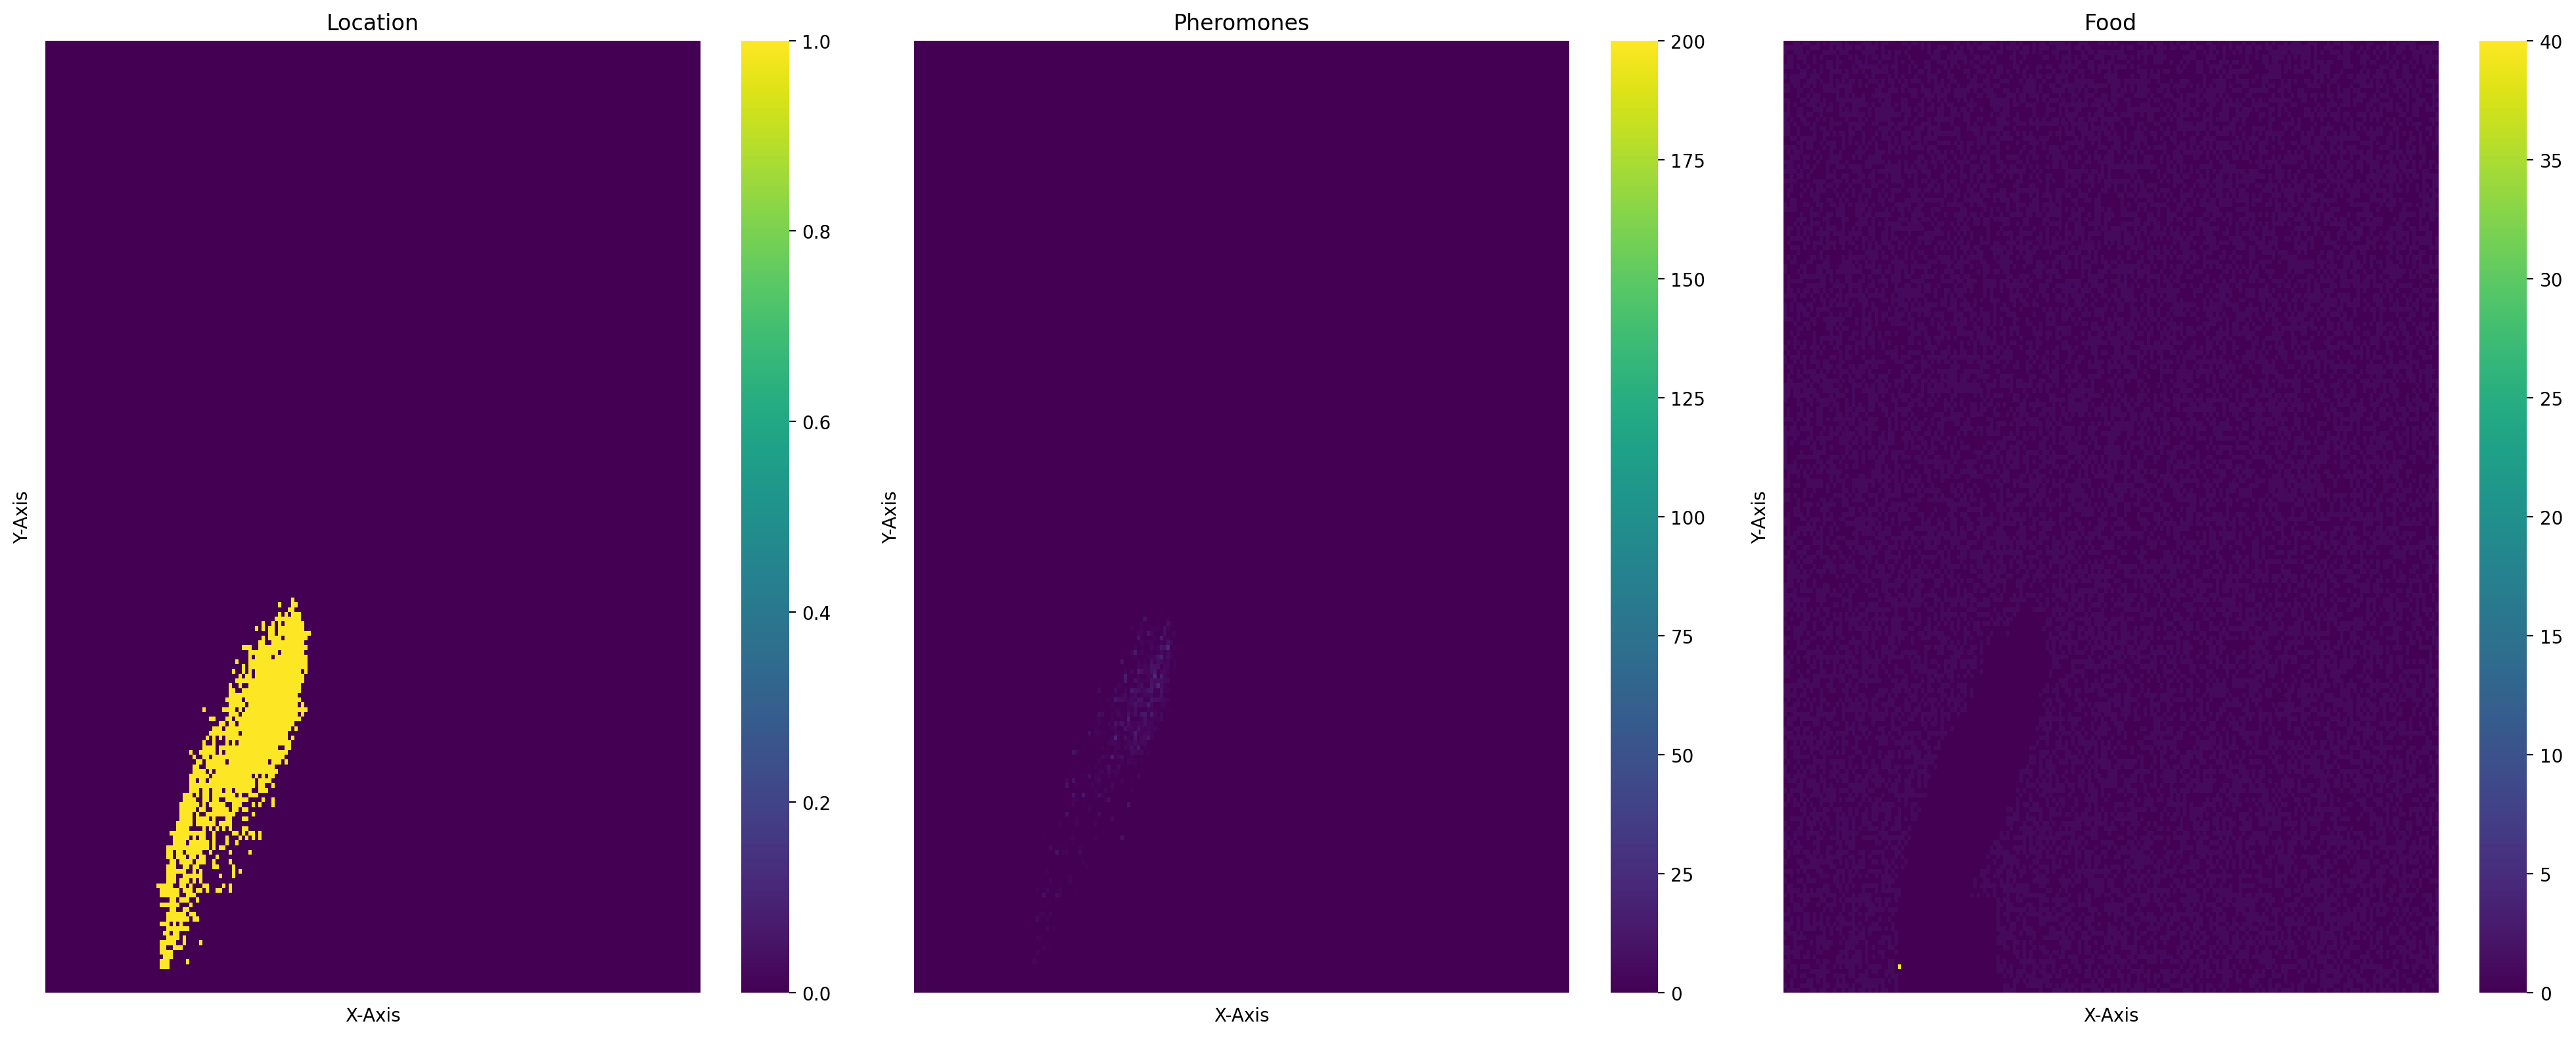

In [19]:
################################################################
# Main Function Run
################################################################


nodes, node_array = create_nodes(n=40000,experiment=1,randomise_capacity = False,terrain=False, nests=False,realistic_world=False, evaporation_rate= 1/30)
new_nodes = model(nodes=nodes,steps=1000,ants_per_step=10,max_ants=4000)
multiplot(new_nodes,one=False,two=False,total=True,exp='<Insert_Plot_Name_Here>')